
# Importing the labraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import seaborn as sns
from sklearn.model_selection import  train_test_split

# Load Dataset

In [136]:
train = pd.read_csv('ti_train.csv')
test = pd.read_csv('ti_test.csv')

In [137]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [139]:
# Overall Statistic information

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# preprocessing

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
#for i in ['Age', 'Cabin', 'Embarked']:
    #train[i]= train[i].fillna(value=0)
    #test[i]= test[i].fillna(value= 0)

In [143]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [161]:
mean =  train['Age'].mean()
train['Age'].fillna(mean, inplace=True)
test['Age'].fillna(mean, inplace=True)

train['Cabin'].fillna('C23', inplace=True)
test['Cabin'].fillna('C23', inplace=True)

train['Embarked'].fillna('Q', inplace=True)
test['Embarked'].fillna('Q', inplace=True)

test['Fare'].fillna(-99999, inplace=True)

In [145]:
train['Cabin'].unique()

array(['C23', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [146]:
encode = LabelEncoder()
train['Sex'] = encode.fit_transform(train['Sex'])
train['Cabin'] = encode.fit_transform(train['Cabin'])
train['Embarked'] = encode.fit_transform(train['Embarked'])

test['Sex'] = encode.fit_transform(test['Sex'])
test['Cabin'] = encode.fit_transform(test['Cabin'])
test['Embarked'] = encode.fit_transform(test['Embarked'])

In [147]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,63,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,82,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,63,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,63,2


In [148]:
train = train.drop(['PassengerId', 'Ticket', 'Name',], 1)

In [162]:
X_test = test.drop(['PassengerId', 'Ticket', 'Name',], 1)

In [150]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,63,2
1,1,1,0,38.0,1,0,71.2833,82,0
2,1,3,0,26.0,0,0,7.9250,63,2


In [163]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,28,1
1,3,0,47.0,1,0,7.0000,28,2
2,2,1,62.0,0,0,9.6875,28,1
3,3,1,27.0,0,0,8.6625,28,2
4,3,0,22.0,1,1,12.2875,28,2


In [152]:
corr = train.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.098891,-0.171249
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.053588,0.166521
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.071682,0.112094
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.009251,-0.031178
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.006561,0.069568
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.013918,0.041137
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.047877,-0.227421
Cabin,0.098891,-0.053588,-0.071682,-0.009251,0.006561,0.013918,-0.047877,1.000000,0.081997
Embarked,-0.171249,0.166521,0.112094,-0.031178,0.069568,0.041137,-0.227421,0.081997,1.000000


# Visualization

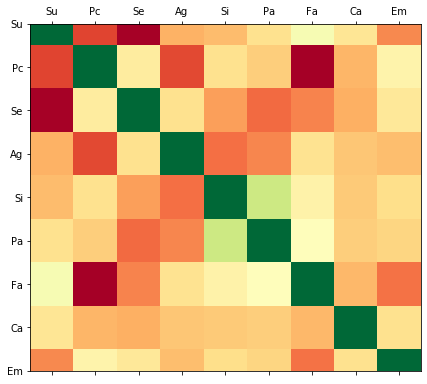

In [153]:
labels = [x[:2] for x in corr.columns]
fig = plt.figure(figsize = (7,7))
ax =fig.add_subplot(111)
ax.matshow(corr, cmap=plt.cm.RdYlGn)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

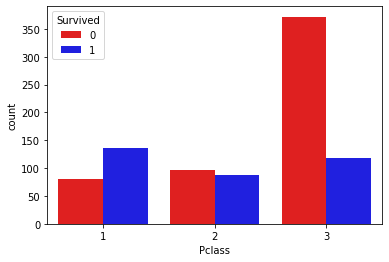

In [154]:
def countplot(var):
    sns.countplot(data=train, x=var, hue='Survived', palette=('R', 'b'))
    plt.show()
countplot('Pclass')



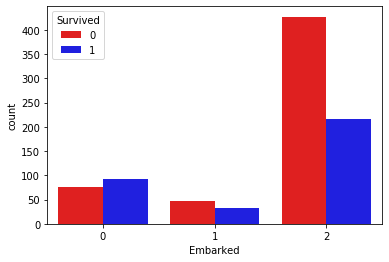

In [155]:
countplot('Embarked')

Normalization

In [156]:
X = train.drop('Survived', 1)
y = train['Survived']

In [157]:
Xtest, Xtrain, ytest, ytrain = train_test_split(X, y, test_size = 0.2)


# Prediction

In [158]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(Xtrain,ytrain)
accuracy = model.score(Xtest,ytest)
accuracy

0.672752808988764

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [109]:
clf = GradientBoostingClassifier(random_state=0)
scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

0.8047752808988764

In [110]:
import xgboost as xgb

C:\Users\USER\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


In [111]:
xg_reg = xgb.XGBClassifier(objective = 'reg:logistic', random_state = 42)
xg_reg.fit(Xtrain, ytrain)
xg_reg.score(Xtest, ytest)

0.7921348314606742

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [116]:
pipe = Pipeline([ ('scaler', StandardScaler()),('model', LogisticRegression())]) 

#pipe = Pipeline([ ('scaler', StandardScaler()),('model', LogisticRegression())]) 
pipe.fit(Xtrain, ytrain)
pipe.score(Xtest, ytest)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8089887640449438

# submission

In [118]:
pred = pipe.predict(Xtest)

In [164]:
predi = pipe.predict_proba(X_test)[:,1]

In [165]:
pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predi}).to_csv('TI_sub', index=False)